In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.dpi'] = 400

In [ ]:
# This creates the file SriLanka_no_sib_logistic_with_BONF.assoc.logistic
# which contains the p-values and Bonferroni corrected p-values
# It does not need to be run again

# df = pd.read_csv("../data/plink-logistic-regression/SriLanka_no_sib_logistic.assoc.logistic", sep="\s+")
# df_adjusted = pd.read_csv("../data/plink-logistic-regression/SriLanka_no_sib_logistic.assoc.logistic.adjusted", sep="\s+")
# df_adjusted = df_adjusted[['SNP', 'BONF']]
# df_all = pd.merge(df, df_adjusted, how="left", on="SNP")
# df_all.to_csv("../data/plink-logistic-regression/SriLanka_no_sib_logistic_with_BONF.assoc.logistic", sep=",", index=False)

In [2]:
assoc = pd.read_csv("../data/plink-logistic-regression/SriLanka_no_sib_logistic_with_BONF.assoc.logistic")
assoc["-logp"] = - np.log10(assoc["BONF"])
assoc

,CHR,SNP,BP,A1,TEST,NMISS,OR,STAT,P,BONF,-logp
0,3003,AX-93233747,53666,C,ADD,30,1.375000,0.247700,0.80440,1.0,-0.0
1,3003,AX-93233753,69429,G,ADD,30,0.591000,-1.109000,0.26750,1.0,-0.0
2,3003,AX-93233757,108122,C,ADD,30,NaN,NaN,NaN,NaN,NaN
3,3003,AX-93233758,118514,A,ADD,30,0.928600,-0.122000,0.90290,1.0,-0.0
4,3003,AX-93233760,134475,G,ADD,30,1.124000,0.215800,0.82920,1.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
10540,3001,AX-93249158,310505644,A,ADD,30,0.000237,-0.008343,0.99330,1.0,-0.0
10541,3001,AX-93249159,310509391,A,ADD,30,4.245000,1.863000,0.06240,1.0,-0.0
10542,3001,AX-93261503,310660610,A,ADD,30,0.409900,-1.485000,0.13740,1.0,-0.0
10543,3001,AX-93261500,310756621,T,ADD,30,0.000237,-0.008343,0.99330,1.0,-0.0


/var/folders/pm/l96dd5x13_10qvswd1y8qcb80000gn/T/ipykernel_13106/231147261.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


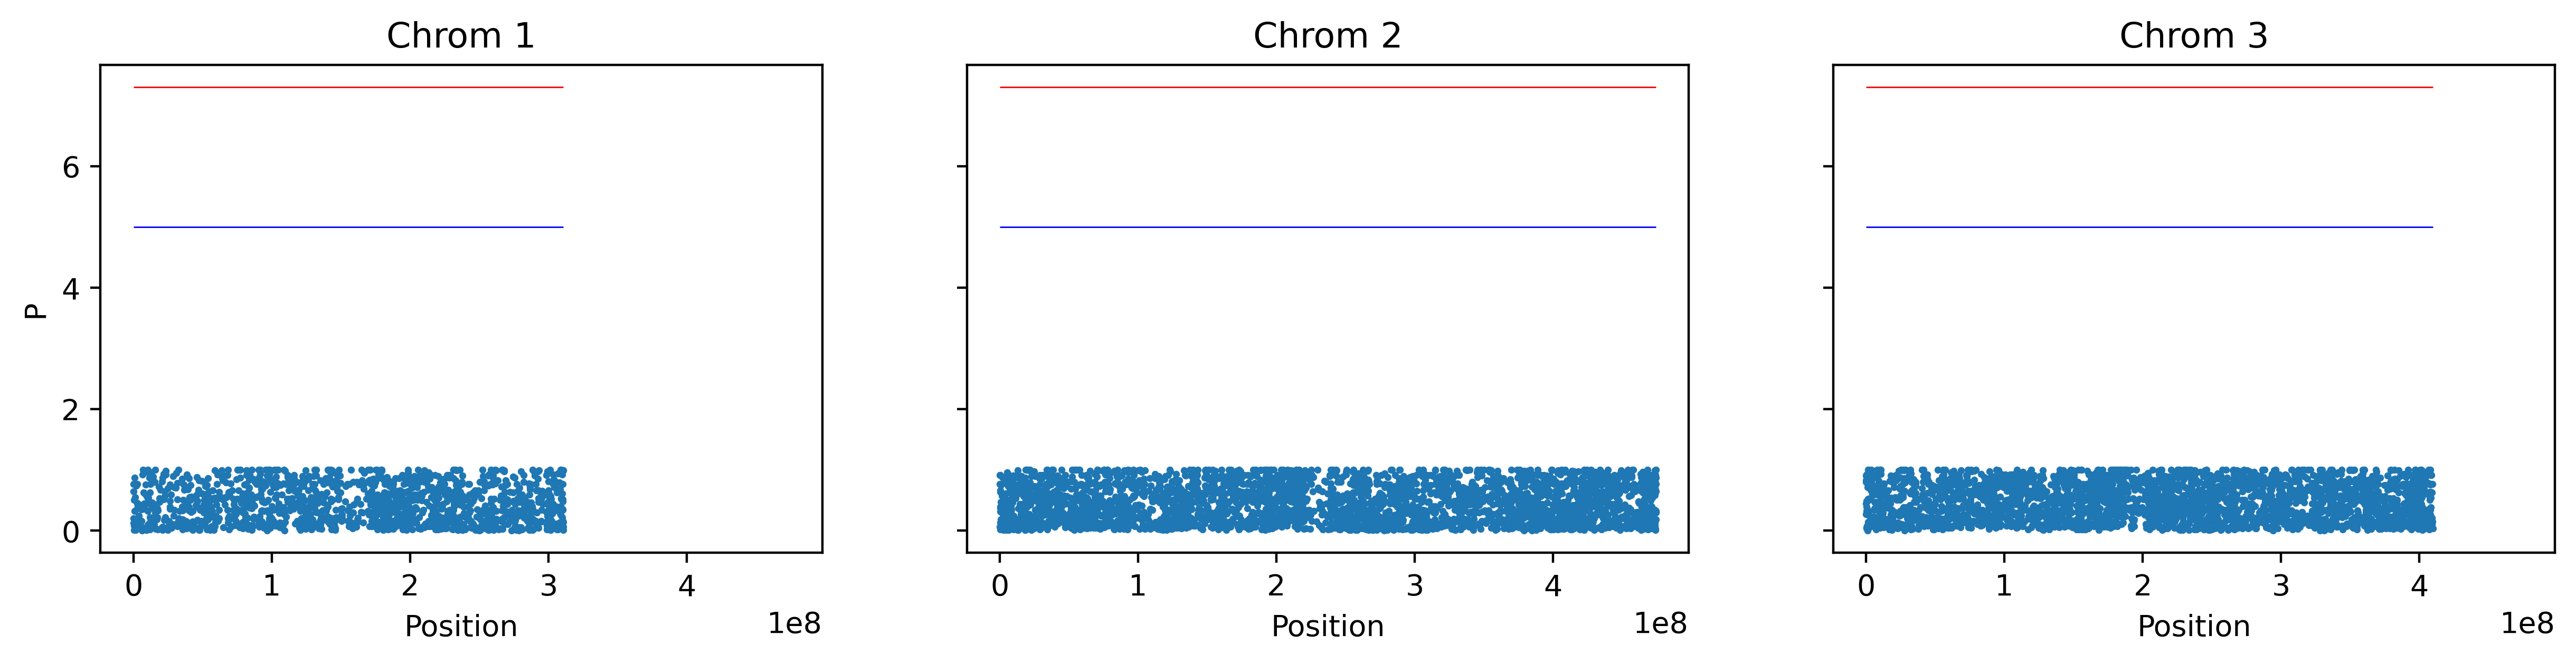

In [3]:
fig, ax = plt.subplots(1, 3, sharey=True, sharex=True,  figsize=(5*3, 3))
ax[0].set_ylabel("P")

for i, chrom in enumerate([3001, 3002, 3003]):
    one_chrom_snps = assoc[assoc["CHR"] == chrom]
    ax[i].set_title(f"Chrom {i + 1}")
    ax[i].scatter(one_chrom_snps["BP"], one_chrom_snps["P"], s=2)
    ax[i].set_xlabel("Position")
    ax[i].hlines(y=-np.log10(5e-8), xmin=0.0, xmax=max(one_chrom_snps["BP"]), color='r', linewidth=0.5)
    ax[i].hlines(y=-np.log10(1e-5), xmin=0.0, xmax=max(one_chrom_snps["BP"]), color='b', linewidth=0.5)
fig.show()

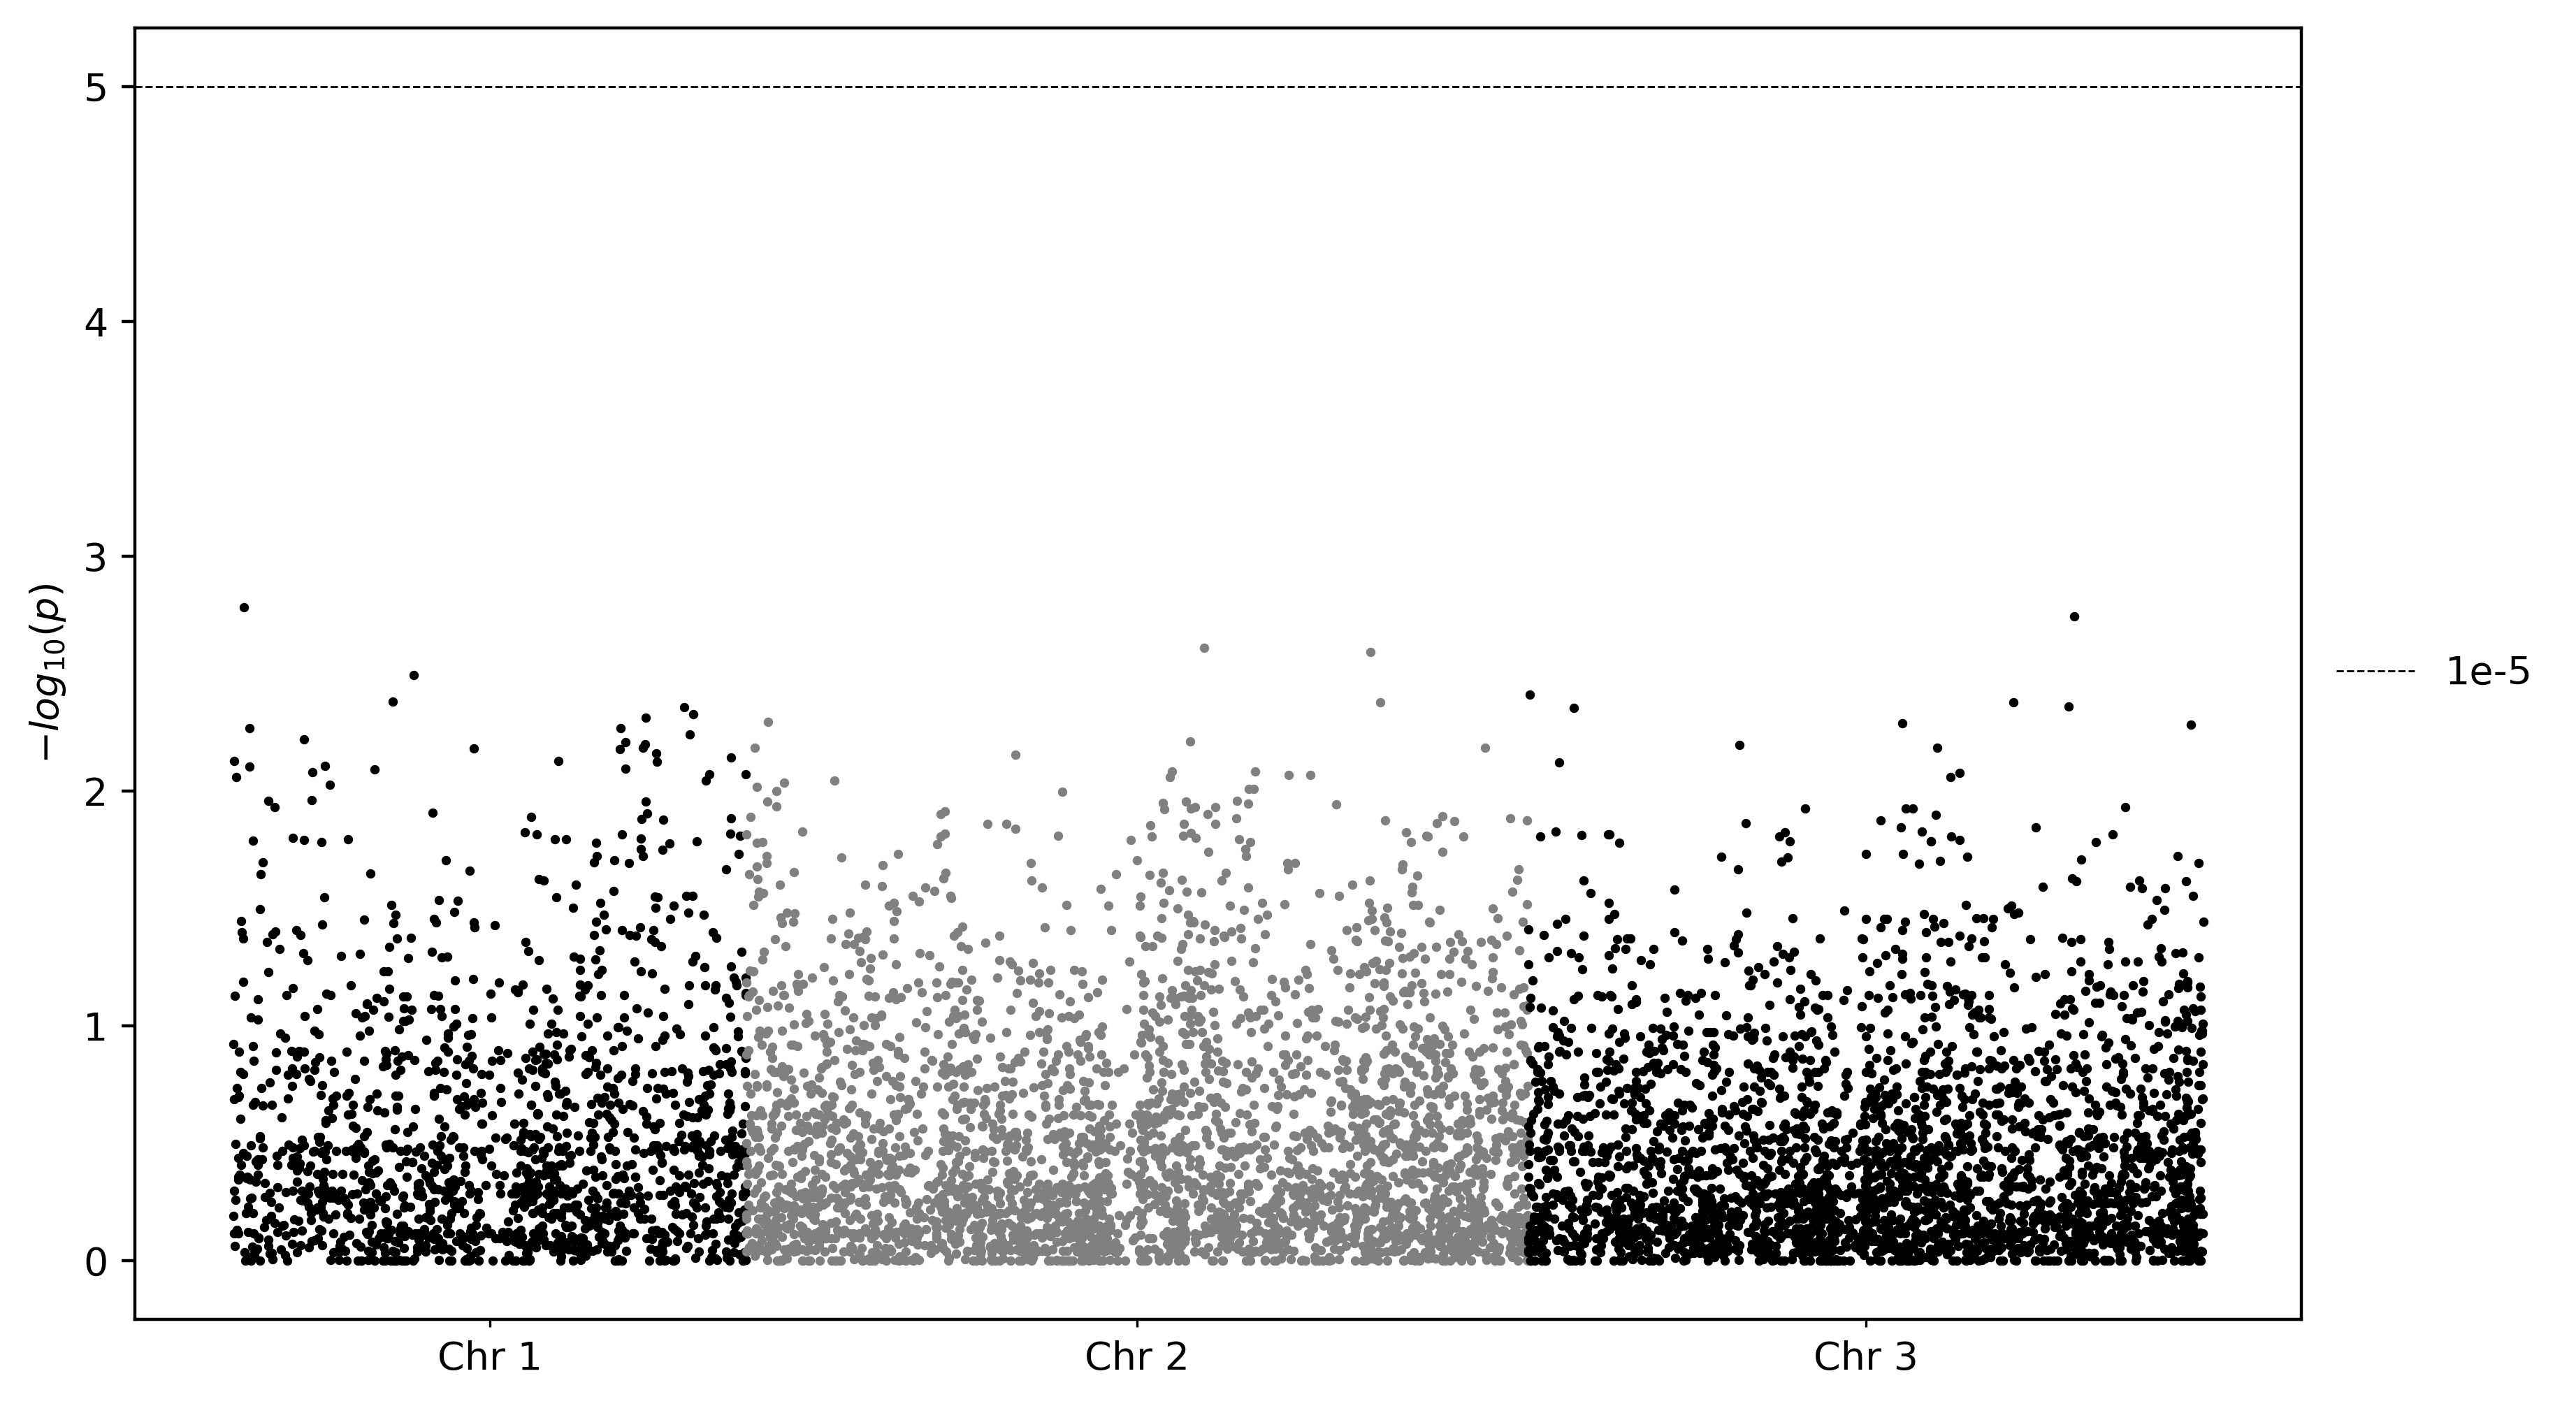

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("$-log_{10}(p)$")
# ax.set_xlabel("Chromosome")

chromosomes = [3001, 3002, 3003]
lengths = [310827022, 474425716, 409777670]
colors = ["black", "grey", "black"]
spacing = 0
cum_lengths = [0, 310827022 + spacing, 310827022 + 474425716 + spacing*2]
centers = [x + y/2 for x, y in zip(cum_lengths, lengths)]

# Modify the x-axis labels
ax.set_xticks(cum_lengths, minor=False)
ax.set_xticklabels(['', '', ''], minor=False)
ax.set_xticks(centers, minor=True)
ax.set_xticklabels(["Chr 1", "Chr 2", "Chr 3"], minor=True)
plt.tick_params(axis='x', labelsize=0, length = 0)

for i, chrom in enumerate(chromosomes):
    one_chrom_snps = assoc[assoc["CHR"] == chrom]
    ax.scatter(one_chrom_snps["BP"] + cum_lengths[i], -np.log10(one_chrom_snps["P"]), color=colors[i], s=2, label=f"Chr {chrom - 3000}")

ax.axhline(y=-np.log10(1e-5), color="black", linestyle="--", linewidth=0.5, label="1e-5")

ax.legend(handles=ax.get_legend_handles_labels()[0][-1:], loc='center left', bbox_to_anchor=(1, 0.5), shadow=False, frameon=False)

plt.show()
